In [1]:
state = 'WV' 
year = 2020
obj_type = 'average_Polsby_Popper'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from WV_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 160 plans from file.


In [6]:
from pareto import filter_and_sort_pareto
from metrics import scores

plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
_,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
print(f"Selected {len(nondominated_warm_starts_plans)} nondominated warm start plans")

Selected 16 nondominated warm start plans


In [7]:
from epsilon_constraint import epsilon_constraint_method

(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )

Initially, L = 887890 and U = 905826 and k = 2.

****************************************
Trying deviation = 8968.58
****************************************
Using user-provided warm starts.
Selected warm_start = [[0, 1, 2, 4, 6, 8, 13, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 31, 33, 34, 36, 43, 45, 49, 50, 52, 54], [3, 5, 7, 9, 10, 11, 12, 14, 15, 16, 21, 24, 25, 30, 32, 35, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 51, 53]]
Objective value: 0.23758746312472134
Deviation: 2230.0

****************************************
Running labeling model!
****************************************
L = 887890 and U = 905826
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to val

* 1823    10              19       0.2387686    0.26983  13.0%  77.9    6s
* 1827    10              22       0.2389669    0.26983  12.9%  77.8    6s
* 1836    10              24       0.2389688    0.26983  12.9%  77.4    6s
* 1851    10              31       0.2392588    0.26983  12.8%  76.8    6s
* 1853    10              32       0.2392592    0.26983  12.8%  76.8    6s
H 1948     8                       0.2394748    0.23999  0.21%  73.8    6s

Cutting planes:
  Gomory: 1
  Cover: 10
  Implied bound: 3
  MIR: 42
  Flow cover: 17
  Inf proof: 25
  Zero half: 5
  RLT: 106

Explored 2033 nodes (146151 simplex iterations) in 6.84 seconds (2.20 work units)
Thread count was 20 (of 20 available processors)

Solution count 9: 0.239475 0.239259 0.239259 ... 0.18997
No other solutions better than 0.239475

Optimal solution found (tolerance 0.00e+00)
Best objective 2.394747734070e-01, best bound 2.394747734070e-01, gap 0.0000%

User-callback calls 4824, time in user-callback 0.12 sec

*********

  RHS range        [1e+00, 9e+05]

User MIP start produced solution with objective 0.189647 (0.03s)
User MIP start produced solution with objective 0.220897 (0.04s)
User MIP start produced solution with objective 0.221448 (0.05s)
Loaded user MIP start with objective 0.221448

Presolve removed 938 rows and 650 columns
Presolve time: 0.02s
Presolved: 813 rows, 736 columns, 3060 nonzeros
Presolved model has 2 quadratic constraint(s)
Variable types: 46 continuous, 690 integer (690 binary)

Root relaxation: objective 9.999990e-01, 264 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   18    0.22145    1.00000   352%     -    0s
     0     0    0.97589    0   80    0.22145    0.97589   341%     -    0s
     0     0    0.97361    0   84    0.22145    0.97361   340%     -    0s
     0     0    0.94215    0   98    0.22145


Cutting planes:
  Lazy constraints: 5

Explored 47065 nodes (1361194 simplex iterations) in 59.71 seconds (9.19 work units)
Thread count was 20 (of 20 available processors)

Solution count 10: 0.215024 0.214965 0.214963 ... 0.21179
No other solutions better than 0.215024

Optimal solution found (tolerance 0.00e+00)
Best objective 2.150235176086e-01, best bound 2.150235176086e-01, gap 0.0000%

User-callback calls 96427, time in user-callback 0.76 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[0, 1, 2, 4, 5, 6, 8, 9, 13, 17, 18, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 43, 45, 49, 50, 52, 54], [3, 7, 10, 11, 12, 14, 15, 16, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 51, 53]]

****************************************
Trying deviation = 1448.75
****************************************
Using user-provided warm starts.
Selected warm_start = [[0, 1, 2, 6, 9, 13, 17, 19, 20, 2


     0     0    1.00000    0   12    0.20025    1.00000   399%     -    0s
     0     0    0.97638    0   81    0.20025    0.97638   388%     -    0s
     0     0    0.97346    0   87    0.20025    0.97346   386%     -    0s
     0     0    0.97310    0   85    0.20025    0.97310   386%     -    0s
     0     0    0.91760    0  109    0.20025    0.91760   358%     -    0s
     0     0    0.90549    0   85    0.20025    0.90549   352%     -    0s
     0     0    0.88186    0  117    0.20025    0.88186   340%     -    0s
     0     0    0.88014    0  151    0.20025    0.88014   340%     -    0s
     0     0    0.87587    0  192    0.20025    0.87587   337%     -    1s
     0     0    0.87519    0  194    0.20025    0.87519   337%     -    1s
     0     0    0.87078    0  209    0.20025    0.87078   335%     -    1s
     0     0    0.86942    0  217    0.20025    0.86942   334%     -    1s
     0     0    0.86218    0  212    0.20025    0.86218   331%     -    1s
     0     0    0.86212 

 272623 35027    0.21019   53   41    0.19354    0.21094  8.99%  23.2  110s
 283412 35491 infeasible   59         0.19354    0.21068  8.85%  23.2  116s
 295466 35301 infeasible   67         0.19354    0.21043  8.72%  23.1  120s
 307339 34057 infeasible   45         0.19354    0.20987  8.44%  23.2  125s
 320546 33204    0.19495   47   93    0.19354    0.20801  7.48%  23.1  130s
 335200 31804 infeasible   50         0.19354    0.20666  6.78%  23.1  135s
 345641 30142    0.20303   56   32    0.19354    0.20492  5.88%  23.0  140s
 363049 31636    0.20308   64   24    0.19354    0.20312  4.95%  23.2  145s
 372504 32713    0.19531   44   14    0.19354    0.20312  4.95%  23.4  150s
 381356 34430    0.19514   50   39    0.19354    0.20312  4.95%  23.6  155s
 388623 34790    0.20128   46   77    0.19354    0.20304  4.91%  23.5  160s
 398068 34650    0.20177   53   50    0.19354    0.20297  4.87%  23.5  166s
 409139 34562 infeasible   59         0.19354    0.20288  4.82%  23.3  171s
 416582 3434

 99971 16654    0.20257   42   57    0.18101    0.20312  12.2%  26.6  102s
 105326 16771 infeasible   49         0.18101    0.20299  12.1%  26.3  105s
 112764 17444 infeasible   46         0.18101    0.20282  12.0%  26.0  111s
 118591 17506    0.20209   57   53    0.18101    0.20265  12.0%  25.9  116s
 125198 18149    0.18359   66   19    0.18101    0.20249  11.9%  25.8  120s
 134129 18497    0.18741   51   50    0.18101    0.20218  11.7%  25.7  127s
 137436 18274 infeasible   49         0.18101    0.20200  11.6%  25.7  132s
 144523 17962    0.18747   45   36    0.18101    0.20165  11.4%  25.5  135s
 153501 16346 infeasible   77         0.18101    0.20003  10.5%  25.6  140s
 161052 15205 infeasible   64         0.18101    0.19628  8.43%  25.6  146s
 164373 15270 infeasible   62         0.18101    0.19531  7.90%  25.7  150s
 173825 14162 infeasible   50         0.18101    0.19495  7.70%  25.8  155s
 181560 11706    0.18309   52   44    0.18101    0.19416  7.26%  25.7  160s
 187555 10534

 152371 22810 infeasible   52         0.18101    0.20312  12.2%  26.3  140s
 161591 23345 infeasible   56         0.18101    0.20289  12.1%  26.1  145s
 173766 23989 infeasible   58         0.18101    0.20256  11.9%  26.0  150s
 182323 24367    0.20214   52   86    0.18101    0.20228  11.7%  25.9  155s
 192673 24172     cutoff   52         0.18101    0.20172  11.4%  25.9  160s
 204247 22152 infeasible   44         0.18101    0.20069  10.9%  25.9  165s
 213627 20021 infeasible   56         0.18101    0.19768  9.21%  25.9  170s
 221023 19024 infeasible   48         0.18101    0.19531  7.90%  26.1  175s
 230029 17859    0.19479   51   39    0.18101    0.19490  7.67%  26.0  180s
 238176 15451    0.18521   53   87    0.18101    0.19423  7.30%  25.9  185s
 247353 12867 infeasible   60         0.18101    0.19121  5.63%  25.9  190s
 255283 12158    0.18717   56   47    0.18101    0.18974  4.82%  25.9  195s
 263576 11820 infeasible   40         0.18101    0.18974  4.82%  26.1  200s
 266984 1243

 137348 28322 infeasible   64         0.17845    0.21621  21.2%  23.8  145s
 143776 29576    0.21521   46   69    0.17845    0.21592  21.0%  23.9  151s
 149880 30579 infeasible   39         0.17845    0.21540  20.7%  23.9  156s
 156671 31049 infeasible   50         0.17845    0.21484  20.4%  24.0  160s
 164785 31321    0.20274   59   22    0.17845    0.21419  20.0%  24.1  166s
 168277 31584    0.20205   53   25    0.17845    0.21353  19.7%  24.2  170s
 172936 31996    0.19714   58  126    0.17845    0.21156  18.6%  24.2  175s
 182192 32334    0.19531   48   17    0.17845    0.21094  18.2%  24.2  180s
 188255 32324 infeasible   56         0.17845    0.21049  18.0%  24.2  185s
 195906 30709 infeasible   67         0.17845    0.20918  17.2%  24.2  190s
 206815 29321 infeasible   65         0.17845    0.20501  14.9%  24.2  195s
 212192 30400    0.20306   48   65    0.17845    0.20312  13.8%  24.3  201s
 218064 31633    0.20294   56   26    0.17845    0.20312  13.8%  24.4  207s
 221899 3226

User MIP start produced solution with objective 0.139421 (0.04s)
User MIP start produced solution with objective 0.148211 (0.05s)
Loaded user MIP start with objective 0.148211

Presolve removed 939 rows and 650 columns
Presolve time: 0.03s
Presolved: 812 rows, 736 columns, 3013 nonzeros
Presolved model has 2 quadratic constraint(s)
Variable types: 46 continuous, 690 integer (690 binary)

Root relaxation: objective 9.999990e-01, 258 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   18    0.14821    1.00000   575%     -    0s
     0     0    0.97587    0   76    0.14821    0.97587   558%     -    0s
     0     0    0.97317    0   82    0.14821    0.97317   557%     -    0s
     0     0    0.97313    0   82    0.14821    0.97313   557%     -    0s
     0     0    0.94662    0  126    0.14821    0.94662   539%     - 

 266817 76391    0.19139   75   96    0.14821    0.19901  34.3%  34.7  370s
 271565 77045 infeasible   77         0.14821    0.19882  34.1%  34.6  375s
 277868 78228    0.15735   80   62    0.14821    0.19852  33.9%  34.5  382s
 281529 78866    0.17032   72   23    0.14821    0.19836  33.8%  34.5  386s
 285895 79654    0.16274   80   28    0.14821    0.19813  33.7%  34.4  390s
 289370 80112    0.17699   83   49    0.14821    0.19793  33.5%  34.4  395s
 293148 80811 infeasible   83         0.14821    0.19775  33.4%  34.4  403s
 295890 80896    0.17187   74   48    0.14821    0.19757  33.3%  34.4  405s
 300120 81620    0.16888   79   15    0.14821    0.19735  33.2%  34.3  411s
 303733 81810    0.19228   80   45    0.14821    0.19717  33.0%  34.3  416s
 308013 82490     cutoff   77         0.14821    0.19698  32.9%  34.2  422s
 310168 82502 infeasible   69         0.14821    0.19684  32.8%  34.2  425s
 314189 83310 infeasible   84         0.14821    0.19663  32.7%  34.2  430s
 317932 8363

 673498 154299    0.18209   91   36    0.14821    0.18671  26.0%  34.2  911s
 678342 155953    0.16761   74   89    0.14821    0.18669  26.0%  34.2  916s
 683603 157625    0.17187   77   23    0.14821    0.18667  25.9%  34.1  922s
 688596 159367    0.15965   86   39    0.14821    0.18664  25.9%  34.1  926s
 693582 161191    0.18524   83   30    0.14821    0.18663  25.9%  34.0  931s
 698522 162921    0.18184   66   47    0.14821    0.18660  25.9%  34.0  938s
 701701 163551 infeasible   75         0.14821    0.18660  25.9%  34.0  941s
 706546 165312    0.18452   80   49    0.14821    0.18658  25.9%  34.0  946s
 711337 166989    0.18180   78   36    0.14821    0.18656  25.9%  34.0  952s
 713319 168180    0.18550   62   44    0.14821    0.18655  25.9%  34.0  955s
 718499 170025    0.15358   77   31    0.14821    0.18653  25.9%  33.9  962s
 721852 170585     cutoff   76         0.14821    0.18652  25.8%  33.9  965s
 726785 172289    0.15375   81   51    0.14821    0.18650  25.8%  33.9  971s

 1088255 288749     cutoff   81         0.14821    0.18554  25.2%  32.4 1445s
 1092943 290231 infeasible   85         0.14821    0.18554  25.2%  32.4 1452s
 1094838 291291    0.17503   82   37    0.14821    0.18553  25.2%  32.4 1456s
 1100221 292811    0.18309   79   69    0.14821    0.18552  25.2%  32.4 1463s
 1103259 293228    0.15167   82   34    0.14821    0.18552  25.2%  32.4 1465s
 1107983 294694    0.18012   69   47    0.14821    0.18551  25.2%  32.4 1470s
 1111843 296333    0.17083   80   69    0.14821    0.18550  25.2%  32.4 1477s
 1114866 296817    0.15498   89   22    0.14821    0.18549  25.2%  32.4 1481s
 1116577 297806    0.18133   86   46    0.14821    0.18549  25.2%  32.4 1485s
 1121714 298781 infeasible   76         0.14821    0.18548  25.1%  32.4 1490s
 1126565 300188    0.18484   83   68    0.14821    0.18547  25.1%  32.3 1497s
 1131685 301762    0.18127   84   93    0.14821    0.18546  25.1%  32.3 1503s
 1133465 302324    0.18537   76   66    0.14821    0.18546  25.1

 1501624 400038 infeasible   92         0.14821    0.18489  24.7%  31.7 1976s
 1506442 401088    0.16913   89   52    0.14821    0.18488  24.7%  31.7 1983s
 1508010 401620     cutoff   92         0.14821    0.18488  24.7%  31.7 1985s
 1512327 402924    0.18173   82   57    0.14821    0.18487  24.7%  31.7 1991s
 1516840 403243    0.18158   76   39    0.14821    0.18487  24.7%  31.7 1995s
 1519907 404448 infeasible   91         0.14821    0.18486  24.7%  31.7 2000s
 1524569 405159    0.17989   74   53    0.14821    0.18486  24.7%  31.7 2005s
 1526558 406302    0.17068   78   37    0.14821    0.18485  24.7%  31.7 2010s
 1531201 407491    0.18164   76  125    0.14821    0.18485  24.7%  31.7 2015s
 1535557 408573    0.18130   91   38    0.14821    0.18484  24.7%  31.7 2022s
 1538211 408937    0.18472   77   48    0.14821    0.18484  24.7%  31.7 2025s
 1540046 409439    0.15389   80   51    0.14821    0.18484  24.7%  31.7 2030s
 1543972 410366 infeasible   87         0.14821    0.18483  24.7

 2011307 510604    0.17996   74  152    0.14821    0.18426  24.3%  31.4 2505s
 2018473 511701    0.15468   71   24    0.14821    0.18425  24.3%  31.4 2510s
 2022854 512489 infeasible   83         0.14821    0.18424  24.3%  31.4 2515s
 2028990 513496    0.16338   93   22    0.14821    0.18424  24.3%  31.4 2520s
 2035131 514965    0.18290   85   33    0.14821    0.18423  24.3%  31.4 2525s
 2039682 515757    0.18341   86   47    0.14821    0.18423  24.3%  31.4 2530s
 2046802 516942    0.18182   82   42    0.14821    0.18422  24.3%  31.4 2535s
 2052506 518159    0.15375   72   41    0.14821    0.18421  24.3%  31.4 2540s
 2059863 519346    0.15397   83   38    0.14821    0.18420  24.3%  31.4 2546s
 2064463 520239    0.18035   79   50    0.14821    0.18420  24.3%  31.4 2550s
 2070316 521647    0.15625   86   15    0.14821    0.18419  24.3%  31.4 2555s
 2077515 522721 infeasible   90         0.14821    0.18418  24.3%  31.4 2561s
 2083674 524094    0.18197   82   31    0.14821    0.18418  24.3

 2599054 601811 infeasible   77         0.14821    0.18360  23.9%  31.5 3035s
 2605819 602645 infeasible   77         0.14821    0.18360  23.9%  31.5 3040s
 2610252 602521    0.18359   74   10    0.14821    0.18359  23.9%  31.6 3046s
 2614635 602723    0.18206   77   35    0.14821    0.18359  23.9%  31.6 3051s
 2618398 603228    0.15480   78   20    0.14821    0.18359  23.9%  31.6 3055s
 2624294 603876     cutoff   75         0.14821    0.18358  23.9%  31.6 3060s
 2630374 604704    0.18071   79   52    0.14821    0.18358  23.9%  31.6 3065s
 2637127 605399    0.15285   86   40    0.14821    0.18357  23.9%  31.6 3070s
 2642918 606183    0.18297   78   18    0.14821    0.18356  23.9%  31.6 3075s
 2649597 606748 infeasible   82         0.14821    0.18356  23.8%  31.6 3080s
 2655278 607461    0.18204   76   63    0.14821    0.18355  23.8%  31.6 3085s
 2661934 608034    0.18299   73   85    0.14821    0.18354  23.8%  31.6 3090s
 2667803 608920     cutoff   80         0.14821    0.18353  23.8

 3250205 662032    0.18091   79   42    0.14821    0.18285  23.4%  31.9 3566s
 3256496 662373 infeasible   82         0.14821    0.18284  23.4%  31.9 3570s
 3262082 662763    0.18273   85   39    0.14821    0.18283  23.4%  31.9 3575s
 3267829 663080    0.17731   69  159    0.14821    0.18283  23.4%  31.9 3581s
 3274500 663462    0.18187   67  113    0.14821    0.18282  23.4%  31.9 3585s
 3280061 664008     cutoff   73         0.14821    0.18281  23.3%  31.9 3590s
 3286412 664332    0.15243   77   34    0.14821    0.18281  23.3%  31.9 3595s
 3292095 664761    0.18279   78   66    0.14821    0.18280  23.3%  31.9 3600s
 3298508 665073 infeasible   79         0.14821    0.18279  23.3%  31.9 3605s
 3304097 665414    0.15741   86   79    0.14821    0.18278  23.3%  31.9 3610s
 3310896 665672    0.18272   74   63    0.14821    0.18277  23.3%  31.9 3615s
 3316451 666014    0.16580   81   83    0.14821    0.18276  23.3%  31.9 3620s
 3322304 666223    0.15313   87   48    0.14821    0.18276  23.3

 3886286 684332 infeasible   79         0.14821    0.18192  22.7%  32.1 4095s
 3892029 684397     cutoff   86         0.14821    0.18191  22.7%  32.1 4100s
 3896153 684451 infeasible   94         0.14821    0.18190  22.7%  32.1 4105s
 3903020 684497 infeasible   85         0.14821    0.18189  22.7%  32.1 4111s
 3907000 684610    0.15143   70   72    0.14821    0.18188  22.7%  32.1 4115s
 3911953 684634     cutoff   92         0.14821    0.18188  22.7%  32.1 4120s
 3918407 684667    0.16665   85   43    0.14821    0.18186  22.7%  32.1 4127s
 3923146 684708     cutoff   81         0.14821    0.18186  22.7%  32.1 4131s
 3927212 684676    0.15018   93   43    0.14821    0.18185  22.7%  32.1 4135s
 3933641 684679    0.16730   85   37    0.14821    0.18184  22.7%  32.1 4140s
 3938170 684675    0.17953   88   50    0.14821    0.18183  22.7%  32.1 4145s
 3941884 684616    0.17408   75   50    0.14821    0.18182  22.7%  32.1 4150s
 3946335 684628 infeasible   80         0.14821    0.18182  22.7

 4451567 676657    0.15508   91   51    0.14821    0.18070  21.9%  32.0 4627s
 4456366 676488     cutoff   84         0.14821    0.18069  21.9%  32.0 4631s
 4461829 676262    0.17906   80   30    0.14821    0.18067  21.9%  32.0 4636s
 4466471 676017    0.18059   79   49    0.14821    0.18066  21.9%  32.0 4640s
 4473297 675725    0.17961   70   78    0.14821    0.18064  21.9%  32.0 4645s
 4479080 675523 infeasible   84         0.14821    0.18063  21.9%  32.0 4651s
 4484298 675343    0.18012   82   83    0.14821    0.18061  21.9%  32.0 4656s
 4488272 675258     cutoff   73         0.14821    0.18060  21.9%  32.0 4660s
 4496360 675036    0.15008   83   15    0.14821    0.18058  21.8%  32.0 4667s
 4501270 674845    0.15321   73   61    0.14821    0.18056  21.8%  32.0 4671s
 4506661 674661    0.15860   85   47    0.14821    0.18055  21.8%  32.0 4676s
 4511109 674609 infeasible   88         0.14821    0.18053  21.8%  32.0 4680s
 4517577 674390    0.15363   77   50    0.14821    0.18051  21.8

 5047737 666063    0.16969   78   49    0.14821    0.17833  20.3%  32.1 5155s
 5054636 666355    0.16428   79   32    0.14821    0.17829  20.3%  32.1 5161s
 5060636 666565    0.14992   80   27    0.14821    0.17825  20.3%  32.1 5166s
 5066604 666372    0.17802   85   35    0.14821    0.17822  20.2%  32.1 5171s
 5071925 666428 infeasible   84         0.14821    0.17819  20.2%  32.1 5175s
 5078175 666575    0.15517   89   13    0.14821    0.17815  20.2%  32.1 5180s
 5084575 666912    0.17633   85   38    0.14821    0.17812  20.2%  32.1 5185s
 5093144 667304 infeasible   85         0.14821    0.17807  20.1%  32.1 5191s
 5098384 667538    0.17458   71  119    0.14821    0.17804  20.1%  32.1 5195s
 5103167 667641    0.16700   80   59    0.14821    0.17800  20.1%  32.1 5200s
 5109772 667734    0.15886   86   59    0.14821    0.17796  20.1%  32.1 5206s
 5114694 667788    0.17702   75   78    0.14821    0.17794  20.1%  32.1 5210s
 5120326 667850 infeasible   91         0.14821    0.17790  20.0

 5702230 683474    0.17110   80   54    0.14821    0.17445  17.7%  31.9 5685s
 5708751 683648    0.17184   70   26    0.14821    0.17441  17.7%  31.9 5690s
 5715518 683775    0.15215   87   38    0.14821    0.17436  17.6%  31.9 5695s
 5721701 683359 infeasible   96         0.14821    0.17432  17.6%  31.8 5701s
 5725489 683304    0.17139   90   16    0.14821    0.17429  17.6%  31.8 5705s
 5733037 683316 infeasible   87         0.14821    0.17423  17.6%  31.8 5710s
 5740035 683430    0.16548   89   35    0.14821    0.17418  17.5%  31.8 5715s
 5746199 683292    0.16418   80   33    0.14821    0.17413  17.5%  31.8 5720s
 5753668 683224 infeasible   87         0.14821    0.17407  17.4%  31.8 5726s
 5760342 683161    0.15557   85   61    0.14821    0.17401  17.4%  31.8 5731s
 5765118 683206    0.15448   85   40    0.14821    0.17397  17.4%  31.8 5735s
 5771824 683334    0.14845   81   20    0.14821    0.17392  17.3%  31.8 5740s
 5777908 683108    0.16832   83   97    0.14821    0.17387  17.3

 6294176 690991    0.15565   75   31    0.14821    0.17109  15.4%  32.3 6215s
 6300172 691243    0.15889   85   34    0.14821    0.17107  15.4%  32.3 6220s
 6304593 691482 infeasible   91         0.14821    0.17106  15.4%  32.3 6225s
 6311200 691848    0.15516   76   29    0.14821    0.17103  15.4%  32.3 6230s
 6317430 692072    0.16166   79   22    0.14821    0.17101  15.4%  32.3 6236s
 6322501 692280    0.16335   69   71    0.14821    0.17099  15.4%  32.3 6241s
 6326841 692596    0.16683   82   46    0.14821    0.17097  15.4%  32.3 6245s
 6332668 692866    0.17083   77   60    0.14821    0.17095  15.3%  32.3 6250s
 6338617 693158    0.16648   86   32    0.14821    0.17093  15.3%  32.4 6255s
 6344762 693478    0.16864   90   27    0.14821    0.17091  15.3%  32.4 6261s
 6349678 693122 infeasible   85         0.14821    0.17090  15.3%  32.4 6266s
 6354463 693361 infeasible   85         0.14821    0.17088  15.3%  32.4 6270s
 6360087 694031    0.17082   84  106    0.14821    0.17086  15.3

 6897447 713188    0.15537   82   55    0.14821    0.16930  14.2%  32.8 6746s
 6902756 713162     cutoff   88         0.14821    0.16928  14.2%  32.8 6750s
 6906308 713157    0.16376   90   30    0.14821    0.16928  14.2%  32.8 6755s
 6913269 713376 infeasible   99         0.14821    0.16925  14.2%  32.8 6760s
 6918997 713516    0.15946   83   24    0.14821    0.16924  14.2%  32.8 6765s
 6924947 713576 infeasible   92         0.14821    0.16922  14.2%  32.8 6770s
 6930122 713751 infeasible   81         0.14821    0.16920  14.2%  32.8 6775s
 6935027 713747     cutoff   81         0.14821    0.16919  14.2%  32.8 6780s
 6941505 713974    0.16148   90   30    0.14821    0.16917  14.1%  32.8 6786s
 6947498 714005    0.15621   95   38    0.14821    0.16915  14.1%  32.8 6791s
 6953430 714476    0.16758   90   25    0.14821    0.16913  14.1%  32.8 6796s
 6958551 714491    0.16416   76   49    0.14821    0.16912  14.1%  32.8 6800s
 6965575 714532    0.16392   77   69    0.14821    0.16910  14.1

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
epsilon = 1 / (2 * G._k)
min_deviation = min(round(r[2], 1) for r in result)

if min_deviation < epsilon:
    no_solution_region = None
else:
    no_solution_region = [0, min_deviation]

if no_solution_region is not None:
    print(f"No feasible solution was found within the region: {no_solution_region}")


####################################################################################################
Pareto Frontier for state WV,  objective average_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 2, 4, 6, 8, 9, 13, 17, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 43, 45, 50, 51, 54], [1, 3, 5, 7, 10, 11, 12, 14, 15, 16, 18, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 44, 46, 47, 48, 49, 52, 53]], [[0, 1, 2, 5, 13, 17, 18, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 45, 46, 49, 50, 52, 54], [3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 51, 53]], [[0, 1, 2, 4, 6, 8, 9, 10, 13, 15, 17, 18, 20, 22, 23, 26, 28, 29, 30, 31, 33, 34, 43, 45, 49, 50, 52, 54], [3, 5, 7, 11, 12, 14, 16, 19, 21, 24, 25, 27, 32, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 51, 53]], [[0, 1, 2, 6, 9, 13, 15, 17, 19, 20, 22, 23, 26, 27, 28, 29, 31,

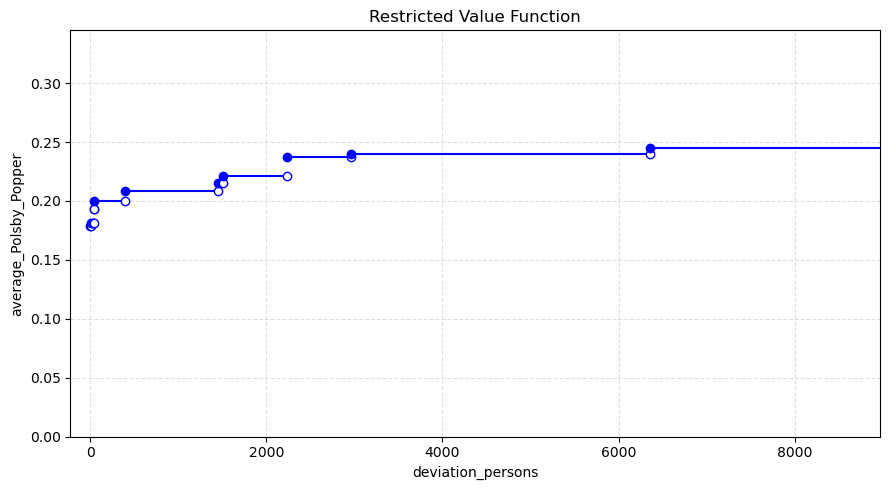

In [10]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             )


####################################################################################################
Pareto maps for state WV, objective average_Polsby_Popper
####################################################################################################



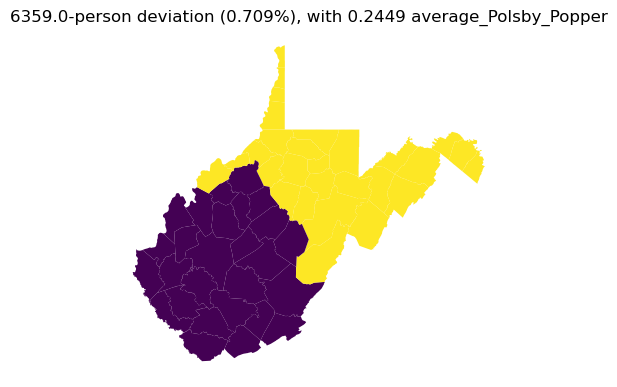

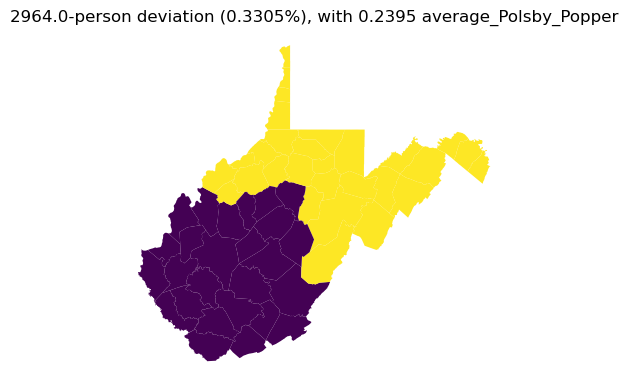

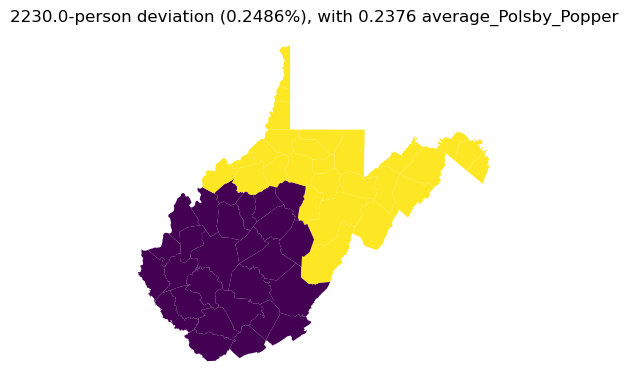

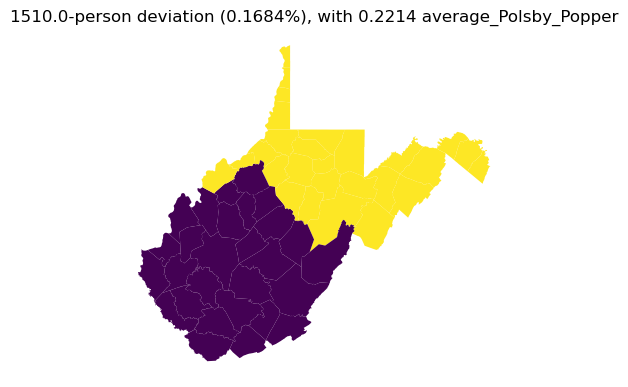

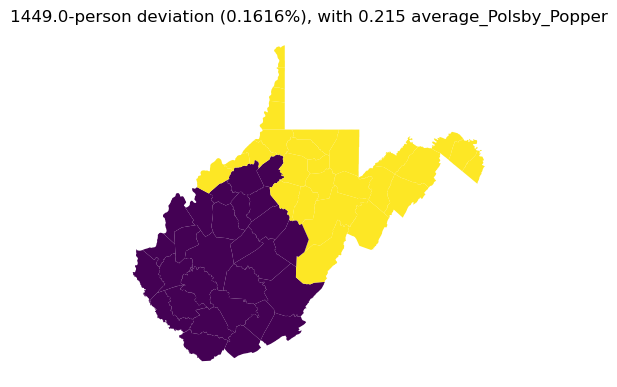

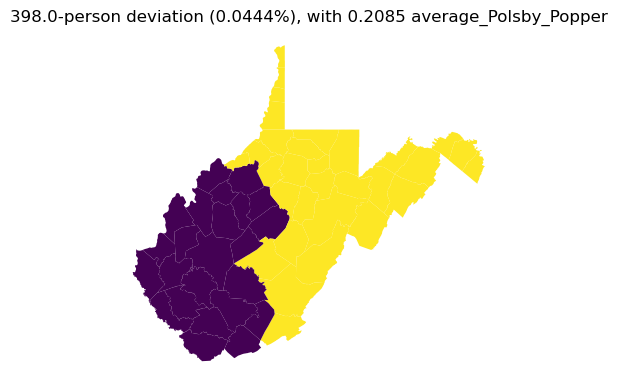

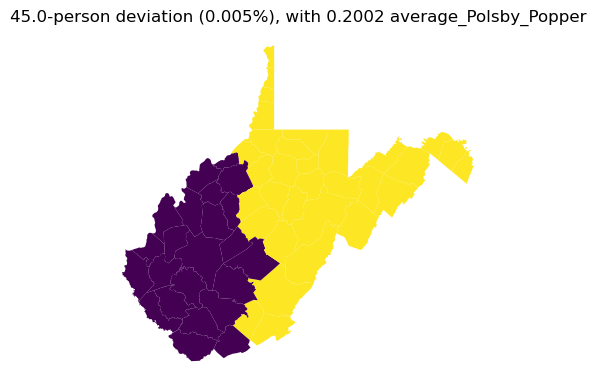

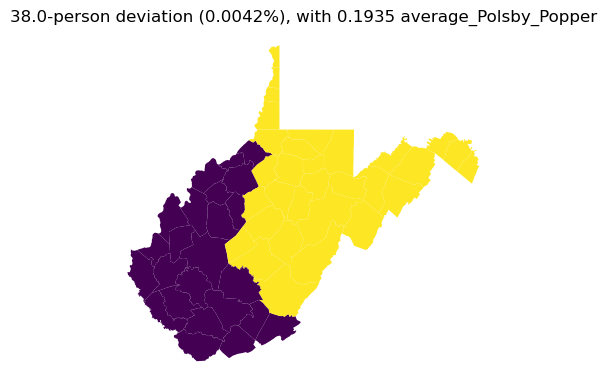

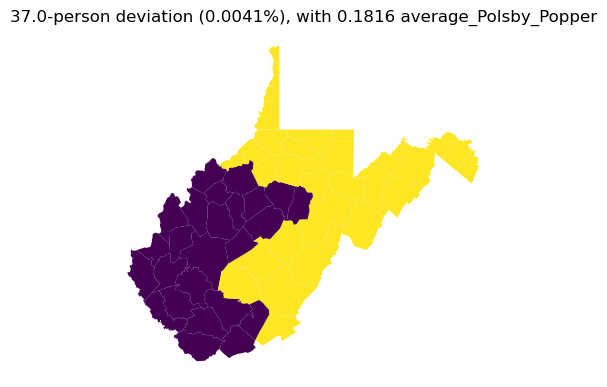

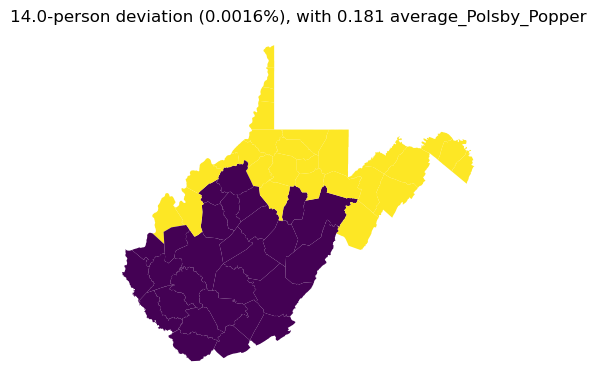

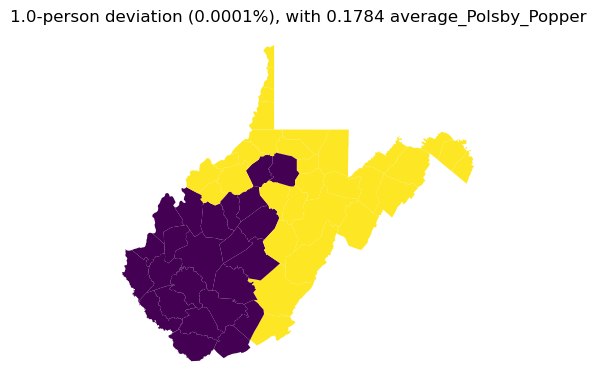

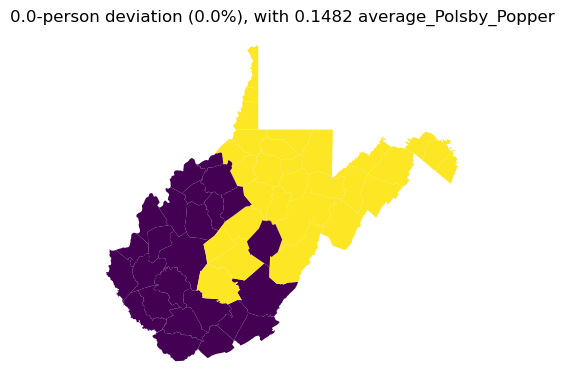

In [11]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)